<a href="https://colab.research.google.com/github/Mohamed-Elhoufy/GitHubFiles/blob/master/AI_Classification_250_Bird_Species_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AI Classification 250 Bird Species

CNN --> Customized / ResNet / VGG16 / AlexNet / Mobilenet / DensNet 

Dataset : (RGB) (224 X 224 *X* 3 ) (250 Classification)

https://www.kaggle.com/gpiosenka/100-bird-species

Authors:

*   Amr Mohamed Ahmed Khalil
*   Mohamed Mohamed Abdelaziz Elhoufy
*   Muhamed Refaat Mahmoud Allam

Importing Dataset and Libraries

In [1]:
#Used to make data more uniform across screen.
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
#Import packages used here:
# for initial data exploration:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from IPython.display import Image, display
import random
import math

#For modeling and model viewing. 
import tensorflow as tf
from keras.preprocessing.image import load_img,img_to_array,ImageDataGenerator
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import plot_model 
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Activation,Concatenate
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import to_categorical #Image generator used for transformation to categorical
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler, ReduceLROnPlateau
from tensorflow.keras import backend, models
from sklearn.metrics import confusion_matrix

from tensorflow.keras.applications import ResNet101,DenseNet121,VGG16, MobileNet
from keras.applications.vgg16 import preprocess_input

In [3]:
#Installing Kaggle api (file is downloaded form Kaggle website and uploaded to colab)
!pip install -q kaggle

from google.colab import files
files.upload()

! mkdir ~/.kaggle #Make directory named kaggle 
! cp kaggle.json ~/.kaggle/   # copy kaggle.json file there.
! chmod 600 ~/.kaggle/kaggle.json #Change the permissions of the file.

Saving kaggle.json to kaggle.json


In [4]:
#Download dataset 
!kaggle datasets download -d gpiosenka/100-bird-species
!ls
#Unzip dataset
!unzip 100-bird-species.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/TEAL DUCK/112.jpg  
  inflating: train/TEAL DUCK/113.jpg  
  inflating: train/TEAL DUCK/114.jpg  
  inflating: train/TEAL DUCK/115.jpg  
  inflating: train/TEAL DUCK/116.jpg  
  inflating: train/TEAL DUCK/117.jpg  
  inflating: train/TEAL DUCK/118.jpg  
  inflating: train/TEAL DUCK/119.jpg  
  inflating: train/TEAL DUCK/120.jpg  
  inflating: train/TEAL DUCK/121.jpg  
  inflating: train/TEAL DUCK/122.jpg  
  inflating: train/TEAL DUCK/123.jpg  
  inflating: train/TEAL DUCK/124.jpg  
  inflating: train/TEAL DUCK/125.jpg  
  inflating: train/TEAL DUCK/126.jpg  
  inflating: train/TEAL DUCK/127.jpg  
  inflating: train/TEAL DUCK/128.jpg  
  inflating: train/TEAL DUCK/129.jpg  
  inflating: train/TEAL DUCK/130.jpg  
  inflating: train/TEAL DUCK/131.jpg  
  inflating: train/TEAL DUCK/132.jpg  
  inflating: train/TEAL DUCK/133.jpg  
  inflating: train/TEAL DUCK/134.jpg  
  inflating: train/TEAL DUCK/135.jpg  
  inflating: 

In [5]:
#This will setup directories for all of the data files in the 250-bird-species dataset. 
ALL_DIR = '/content/consolidated'
TRAIN_DIR = '/content/train'
VALIDATION_DIR = '/content/valid'
TEST_DIR = '/content/test'


In [6]:
#This will establish the prediction groups for the model.
CATEGORIES = os.listdir(TRAIN_DIR)
print(str(len(CATEGORIES)),'CATEGORIES are ', CATEGORIES)

Category_count = len(CATEGORIES)

250 CATEGORIES are  ['MALACHITE KINGFISHER', 'CHIPPING SPARROW', 'GREEN JAY', 'JABIRU', 'CINNAMON TEAL', 'GAMBELS QUAIL', 'SCARLET IBIS', 'VARIED THRUSH', 'ARARIPE MANAKIN', 'ROSY FACED LOVEBIRD', 'BARN SWALLOW', 'WHITE CHEEKED TURACO', 'ANTBIRD', 'SPANGLED COTINGA', 'STRAWBERRY FINCH', 'COMMON GRACKLE', 'STORK BILLED KINGFISHER', 'KOOKABURRA', 'GOLDEN CHLOROPHONIA', 'BIRD OF PARADISE', 'ANNAS HUMMINGBIRD', 'HELMET VANGA', 'HOUSE SPARROW', 'EMPEROR PENGUIN', 'MALEO', 'SPLENDID WREN', 'CALIFORNIA QUAIL', 'TOUCHAN', 'GREATOR SAGE GROUSE', 'TREE SWALLOW', 'GRAY PARTRIDGE', 'COCK OF THE  ROCK', 'RED BELLIED PITTA', 'ROCK DOVE', 'PELICAN', 'GOLDEN PHEASANT', 'PURPLE FINCH', 'PURPLE MARTIN', 'ROUGH LEG BUZZARD', 'CACTUS WREN', 'WHITE NECKED RAVEN', 'YELLOW CACIQUE', 'HOODED MERGANSER', 'BARRED PUFFBIRD', 'MARABOU STORK', 'JAVA SPARROW', 'RUFOUS KINGFISHER', 'FRIGATE', 'MALLARD DUCK', 'TURQUOISE MOTMOT', 'BALD EAGLE', 'VENEZUELIAN TROUPIAL', 'OYSTER CATCHER', 'RED HEADED WOODPECKER', 'AMERICA

Data path

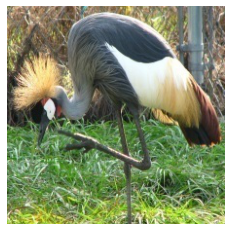

Figures are  (224, 224, 3)


In [7]:
#Load an image and determine image shape for analysis.
IMAGE = load_img("/content/train/AFRICAN CROWNED CRANE/001.jpg")
plt.imshow(IMAGE)
plt.axis("off")
plt.show()

IMAGEDATA = img_to_array(IMAGE)
SHAPE = IMAGEDATA.shape
print('Figures are ', SHAPE)

Dataset preprocessing

In [8]:
#This will be used on training, test, and valid data
General_datagen = ImageDataGenerator(rescale=1./255, )

train_data = General_datagen.flow_from_directory(TRAIN_DIR, target_size=(224,224))
print('data groups:', len(train_data)) #Will be used to determine steps_per_epoch in my models.
Train_groups = len(train_data)
validation_data = General_datagen.flow_from_directory(VALIDATION_DIR, target_size=(224,224),)
image_qty = len(validation_data.filenames)
print('data groups:', len(validation_data))
print('validation image qty:',str(image_qty))
Valid_groups = len(validation_data)
test_data = General_datagen.flow_from_directory(TEST_DIR, target_size=(224,224),)
print('test data groups:', len(test_data))

Found 35215 images belonging to 250 classes.
data groups: 1101
Found 1250 images belonging to 250 classes.
data groups: 40
validation image qty: 1250
Found 1250 images belonging to 250 classes.
data groups: 40


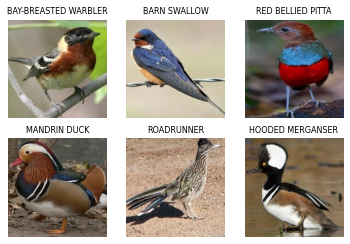

250


In [9]:
#create seperate labels for images 
def label_images2(DIR, dataset):
    label = []
    image = []
    j=0
    for i in range (0,30):
        j = random.randint(0, len(dataset.filenames))
        label.append(dataset.filenames[j].split('/')[0])
        image.append(DIR + '/' + dataset.filenames[j])
    return [label,image]

#plot the random images.
y,x = label_images2(TEST_DIR, test_data)

for i in range(0,6):
    X = load_img(x[i])
    plt.subplot(2,3,+1 + i)
    plt.axis(False)
    plt.title(y[i], fontsize=8)
    plt.imshow(X)
plt.show()

print(Category_count)

CNN Learning Models 
(Customized model 1)

In [ ]:
#Customized CNN model
backend.clear_session() #freeing memory
model = Sequential()

model.add(Conv2D(64, (3, 3), padding='same',input_shape=SHAPE)) #224X224X3
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3))) #222x222
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #111x111
model.add(BatchNormalization())
model.add(Dropout(0.35)) #Doesn't appear to be working in the model summary.

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization()) 

model.add(Conv2D(64, (3, 3))) #109x109
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #54x54
model.add(BatchNormalization())
model.add(Dropout(0.35)) #64 --> 42

model.add(Conv2D(64, (3, 3), padding='same')) #54x54
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Flatten()) 
model.add(Dropout(0.5)) 
model.add(Dense(512)) 
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dense(Category_count)) #Updated for number of classes
model.add(Activation('softmax'))

model.summary()

#Compile
model.compile(optimizer = tf.keras.optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True),
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
activation (Activation)      (None, 224, 224, 64)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 64)      256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 222, 222, 64)      36928     
_________________________________________________________________
activation_1 (Activation)    (None, 222, 222, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 64)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 111, 111, 64)      2

In [ ]:
#fit model
history = model.fit( 
    train_data, 
    steps_per_epoch = Train_groups, 
    epochs = 100,
    validation_data = validation_data,
    validation_steps = Valid_groups,
    verbose = 1,
    callbacks=[EarlyStopping(monitor='val_accuracy', patience = 5, restore_best_weights = True),
               ReduceLROnPlateau(monitor = 'val_loss', factor = 0.7, #0.2 to 0.5 dropped to fast 0.7
                                 patience = 2, verbose = 1)])

Epoch 1/100
1101/1101 [==============================] - 241s 219ms/step - loss: 2.8814 - accuracy: 0.3867 - val_loss: 2.3574 - val_accuracy: 0.4632
Epoch 2/100
1101/1101 [==============================] - 238s 216ms/step - loss: 1.8557 - accuracy: 0.5970 - val_loss: 1.8648 - val_accuracy: 0.5456
Epoch 3/100
1101/1101 [==============================] - 238s 216ms/step - loss: 1.1092 - accuracy: 0.7826 - val_loss: 1.7109 - val_accuracy: 0.5888
Epoch 4/100
1101/1101 [==============================] - 238s 216ms/step - loss: 0.5434 - accuracy: 0.9230 - val_loss: 1.6110 - val_accuracy: 0.5992
Epoch 5/100
1101/1101 [==============================] - 238s 216ms/step - loss: 0.2272 - accuracy: 0.9859 - val_loss: 1.6042 - val_accuracy: 0.6016
Epoch 6/100
1101/1101 [==============================] - 238s 216ms/step - loss: 0.1128 - accuracy: 0.9977 - val_loss: 1.5586 - val_accuracy: 0.6128
Epoch 7/100
1101/1101 [==============================] - 238s 216ms/step - loss: 0.0704 - accuracy: 0.9993

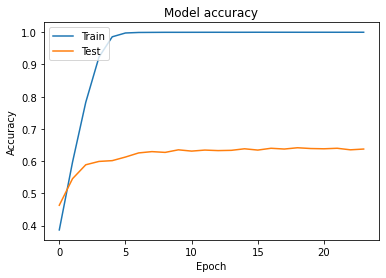

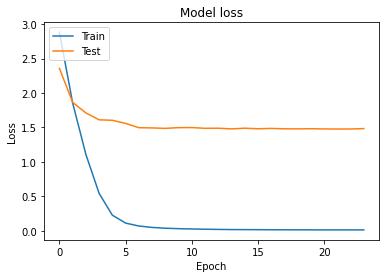

40/40 [==============================] - 3s 71ms/step - loss: 1.3481 - accuracy: 0.6736
Test loss: 1.348085880279541
Test accuracy: 0.6736000180244446


In [ ]:
#plot accuracy vs epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot loss values vs epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Evaluate against test data.
scores = model.evaluate(test_data, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])



Customized model 2

In [10]:
#Customized CNN model
backend.clear_session() #freeing memory
model = Sequential()

model.add(Conv2D(64, (3, 3), padding='same',input_shape=SHAPE)) #224X224X3
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3))) #222x222
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #111x111
model.add(BatchNormalization())
model.add(Dropout(0.35)) #Doesn't appear to be working in the model summary.

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization()) 

model.add(Conv2D(64, (3, 3))) #109x109
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #54x54
model.add(BatchNormalization())
model.add(Dropout(0.35)) #64 --> 42

model.add(Conv2D(64, (3, 3), padding='same')) #54x54
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Flatten()) 
model.add(Dropout(0.5)) 
model.add(Dense(512)) 
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dense(Category_count)) #Updated for number of classes
model.add(Activation('softmax'))

model.summary()

#Compile
optimizer=Adam(lr=0.001)
model.compile(optimizer = optimizer,
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
activation (Activation)      (None, 224, 224, 64)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 64)      256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 222, 222, 64)      36928     
_________________________________________________________________
activation_1 (Activation)    (None, 222, 222, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 64)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 111, 111, 64)      2

In [11]:
#fit model
history = model.fit( 
    train_data, 
    steps_per_epoch = Train_groups, 
    epochs = 100,
    validation_data = validation_data,
    validation_steps = Valid_groups,
    verbose = 1,
    callbacks=[EarlyStopping(monitor='val_accuracy', patience = 5, restore_best_weights = True),
               ReduceLROnPlateau(monitor = 'val_loss', factor = 0.7, #0.2 to 0.5 dropped to fast 0.7
                                 patience = 2, verbose = 1)])

Epoch 1/100
1101/1101 [==============================] - 282s 223ms/step - loss: 4.1746 - accuracy: 0.1812 - val_loss: 2.5532 - val_accuracy: 0.4384
Epoch 2/100
1101/1101 [==============================] - 241s 219ms/step - loss: 1.6881 - accuracy: 0.5970 - val_loss: 1.7450 - val_accuracy: 0.5912
Epoch 3/100
1101/1101 [==============================] - 242s 220ms/step - loss: 0.5800 - accuracy: 0.8608 - val_loss: 1.7803 - val_accuracy: 0.6144
Epoch 4/100
1101/1101 [==============================] - 242s 219ms/step - loss: 0.1273 - accuracy: 0.9728 - val_loss: 1.4585 - val_accuracy: 0.6552
Epoch 5/100
1101/1101 [==============================] - 241s 219ms/step - loss: 0.0529 - accuracy: 0.9907 - val_loss: 1.8487 - val_accuracy: 0.6120
Epoch 6/100
1101/1101 [==============================] - 242s 219ms/step - loss: 0.0732 - accuracy: 0.9816 - val_loss: 3.8181 - val_accuracy: 0.4576

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0007000000332482159.
Epoch 7/100
1101/1101 [==

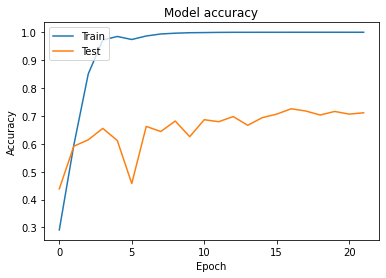

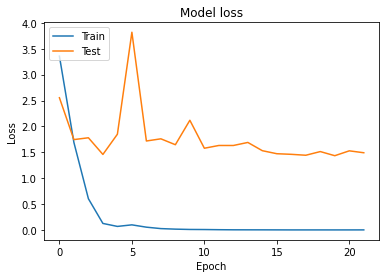

40/40 [==============================] - 3s 68ms/step - loss: 1.3849 - accuracy: 0.7120
Test loss: 1.3848824501037598
Test accuracy: 0.7120000123977661


In [12]:
#plot accuracy vs epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot loss values vs epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Evaluate against test data.
scores = model.evaluate(test_data, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

VGG16 model


In [21]:
#VGG16
backend.clear_session()

#Bring in the imagenet dataset training weights for the VGG16 CNN model, remove the classification, the default shape is correct (3,224,224) for my purposes.
base_vgg16 = VGG16(weights = 'imagenet', include_top = False, input_shape = SHAPE)
base_vgg16.trainable = False # Freeze the VGG16 weights.

model = Sequential()
model.add(base_vgg16)

model.add(Flatten()) #1024#model.add(Dense(256)) 
model.add(Activation('relu'))
model.add(Dense(Category_count)) 
model.add(Activation('softmax'))

model.summary()

#Compile
model.compile(optimizer = tf.keras.optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True),
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])
 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
activation (Activation)      (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 250)               6272250   
_________________________________________________________________
activation_1 (Activation)    (None, 250)               0         
Total params: 20,986,938
Trainable params: 6,272,250
Non-trainable params: 14,714,688
_________________________________________________________________


In [22]:
#fit model
history = model.fit_generator( 
    train_data, 
    steps_per_epoch = Train_groups, 
    epochs = 50,
    validation_data = validation_data,
    validation_steps = Valid_groups,
    verbose = 1,
    callbacks=[EarlyStopping(monitor='val_accuracy', patience = 5, restore_best_weights = True),ReduceLROnPlateau(monitor = 'val_loss', factor = 0.7, #0.2 to 0.5 dropped to fast 0.7
                                 patience = 2, verbose = 1)]) 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
1101/1101 [==============================] - 138s 125ms/step - loss: 4.8770 - accuracy: 0.1188 - val_loss: 2.6371 - val_accuracy: 0.4536
Epoch 2/50
1101/1101 [==============================] - 141s 128ms/step - loss: 2.3871 - accuracy: 0.5143 - val_loss: 1.8141 - val_accuracy: 0.6136
Epoch 3/50
1101/1101 [==============================] - 143s 130ms/step - loss: 1.6163 - accuracy: 0.6721 - val_loss: 1.4626 - val_accuracy: 0.6744
Epoch 4/50
1101/1101 [==============================] - 143s 130ms/step - loss: 1.2255 - accuracy: 0.7601 - val_loss: 1.2741 - val_accuracy: 0.7280
Epoch 5/50
1101/1101 [==============================] - 143s 130ms/step - loss: 0.9763 - accuracy: 0.8130 - val_loss: 1.1430 - val_accuracy: 0.7464
Epoch 6/50
1101/1101 [==============================] - 143s 130ms/step - loss: 0.7967 - accuracy: 0.8578 - val_loss: 1.0245 - val_accuracy: 0.7744
Epoch 7/50
1101/1101 [==============================] - 143s 130ms/step - loss: 0.6557 - accuracy: 0.8907 - val_

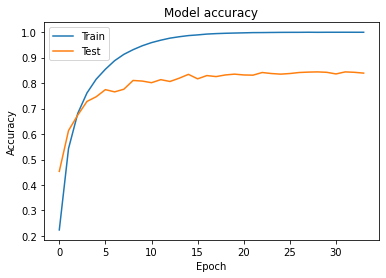

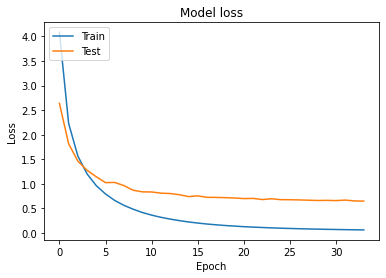

40/40 [==============================] - 5s 114ms/step - loss: 0.5571 - accuracy: 0.8640
Test loss: 0.5571205019950867
Test accuracy: 0.8640000224113464


In [24]:
#plot accuracy vs epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot loss values vs epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Evaluate against test data.
scores = model.evaluate(test_data, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

MobileNet model


In [ ]:
#Mobilenet with ReduceLROnPlateau 
backend.clear_session()

#Bring in the imagenet dataset training weights for the Mobilenet CNN model.
#Remove the classification top.
base_mobilenet = MobileNet(weights = 'imagenet', include_top = False, input_shape = SHAPE)
base_mobilenet.trainable = False # Freeze the mobilenet weights.

model = Sequential()
model.add(base_mobilenet)

model.add(Flatten()) 
model.add(Activation('relu'))
model.add(Dense(Category_count)) 
model.add(Activation('softmax'))

model.summary()

#Compile
model.compile(optimizer = tf.keras.optimizers.SGD(lr=0.001, 
                                                  momentum=0.9, nesterov=True),
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

17227776/17225924 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Function (None, 7, 7, 1024)        3228864   
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0         
_________________________________________________________________
activation (Activation)      (None, 50176)             0         
_________________________________________________________________
dense (Dense)                (None, 250)               12544250  
_________________________________________________________________
activation_1 (Activation)    (None, 250)               0         
Total params: 15,773,114
Trainable params: 12,544,250
Non-trainable params: 3,228,864
_________________________________________________________________


In [ ]:
#fit model
history = model.fit( 
    train_data, 
    steps_per_epoch = Train_groups, 
    epochs = 100,
    validation_data = validation_data,
    validation_steps = Valid_groups,
    verbose = 1,
    callbacks=[EarlyStopping(monitor = 'val_accuracy', patience = 5, 
                             restore_best_weights = True),ReduceLROnPlateau(monitor = 'val_loss', factor = 0.7, #0.2 to 0.5 dropped to fast 0.7
                                 patience = 2, verbose = 1)]) # left verbose 1 so I could see the learning rate decay

Epoch 1/100
1101/1101 [==============================] - 113s 72ms/step - loss: 4.2595 - accuracy: 0.5289 - val_loss: 1.4248 - val_accuracy: 0.8536
Epoch 2/100
1101/1101 [==============================] - 78s 71ms/step - loss: 0.3387 - accuracy: 0.9537 - val_loss: 0.7300 - val_accuracy: 0.9144
Epoch 3/100
1101/1101 [==============================] - 78s 71ms/step - loss: 0.0784 - accuracy: 0.9844 - val_loss: 0.5495 - val_accuracy: 0.9296
Epoch 4/100
1101/1101 [==============================] - 77s 70ms/step - loss: 0.0363 - accuracy: 0.9931 - val_loss: 0.5043 - val_accuracy: 0.9384
Epoch 5/100
1101/1101 [==============================] - 76s 69ms/step - loss: 0.0181 - accuracy: 0.9967 - val_loss: 0.5741 - val_accuracy: 0.9344
Epoch 6/100
1101/1101 [==============================] - 76s 69ms/step - loss: 0.0088 - accuracy: 0.9984 - val_loss: 0.4230 - val_accuracy: 0.9488
Epoch 7/100
1101/1101 [==============================] - 76s 69ms/step - loss: 0.0039 - accuracy: 0.9994 - val_loss: 

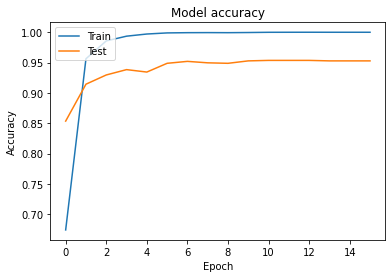

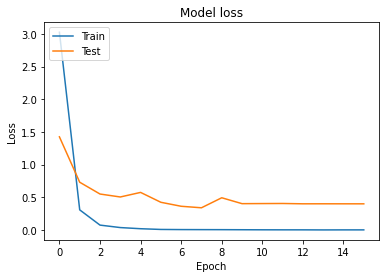

40/40 [==============================] - 3s 64ms/step - loss: 0.2084 - accuracy: 0.9680
Test loss: 0.20841138064861298
Test accuracy: 0.9679999947547913


In [ ]:
#plot accuracy vs epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot loss values vs epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Evaluate against test data.
scores = model.evaluate(test_data, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])


ResNet101

In [ ]:
#ResNet101 model 
backend.clear_session()
base_resnet = ResNet101(weights='imagenet', include_top = False, 
                           input_shape = SHAPE)
base_resnet.trainable = False # Freeze the VGG16 weights.

model = Sequential()
model.add(base_resnet)

model.add(Flatten()) #1024
model.add(Activation('relu'))
model.add(Dense(Category_count)) 
model.add(Activation('softmax'))

model.summary()

#Compile
model.compile(optimizer = tf.keras.optimizers.Adam(),
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])
history = model.fit_generator( 
    train_data, 
    steps_per_epoch = Train_groups, 
    epochs = 50,
    validation_data = validation_data,
    validation_steps = Valid_groups,
    verbose = 1,
    callbacks=[EarlyStopping(monitor='val_accuracy', patience = 5, restore_best_weights = True),ReduceLROnPlateau(monitor = 'val_loss', factor = 0.7, #0.2 to 0.5 dropped to fast 0.7
                                 patience = 2, verbose = 1)])  

171450368/171446536 [==============================] - 2s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet101 (Functional)       (None, 7, 7, 2048)        42658176  
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0         
_________________________________________________________________
activation (Activation)      (None, 100352)            0         
_________________________________________________________________
dense (Dense)                (None, 250)               25088250  
_________________________________________________________________
activation_1 (Activation)    (None, 250)               0         
Total params: 67,746,426
Trainable params: 25,088,250
Non-trainable params: 42,658,176
_________________________________________________________________
Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


1101/1101 [==============================] - 212s 188ms/step - loss: 16.7432 - accuracy: 0.0285 - val_loss: 12.4507 - val_accuracy: 0.0744
Epoch 2/50
1101/1101 [==============================] - 206s 187ms/step - loss: 11.0365 - accuracy: 0.1094 - val_loss: 11.6745 - val_accuracy: 0.1192
Epoch 3/50
1101/1101 [==============================] - 206s 187ms/step - loss: 10.4538 - accuracy: 0.1571 - val_loss: 11.8905 - val_accuracy: 0.1320
Epoch 4/50
1101/1101 [==============================] - 206s 187ms/step - loss: 9.8605 - accuracy: 0.1926 - val_loss: 11.9354 - val_accuracy: 0.1512

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0007000000332482159.
Epoch 5/50
1101/1101 [==============================] - 206s 187ms/step - loss: 6.1770 - accuracy: 0.2885 - val_loss: 7.4135 - val_accuracy: 0.2152
Epoch 6/50
1101/1101 [==============================] - 206s 187ms/step - loss: 5.8107 - accuracy: 0.3136 - val_loss: 7.9456 - val_accuracy: 0.2152
Epoch 7/50
1101/1101 [=============

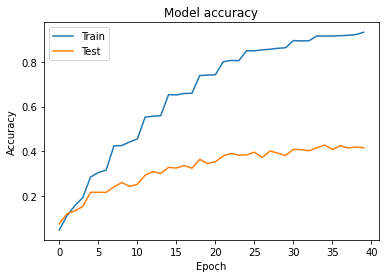

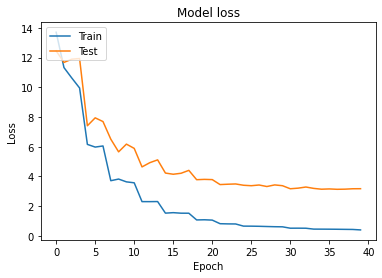

40/40 [==============================] - 7s 168ms/step - loss: 3.1988 - accuracy: 0.4264
Test loss: 3.1988344192504883
Test accuracy: 0.42640000581741333


In [ ]:
#plot accuracy vs epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot loss values vs epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Evaluate against test data.
scores = model.evaluate(test_data, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

AlexNet model #1

In [ ]:
#AlexNet model 1
backend.clear_session()
model = Sequential()
# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=SHAPE, kernel_size=(11,11),\
 strides=(4,4), padding='valid'))
model.add(Activation('relu'))
# Pooling 
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())
# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())
# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())
# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())
# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())
# Fully Connected Layer
model.add(Flatten())
# 1st Dense Layer
model.add(Dense(4096, input_shape=(224*224*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())
# 2nd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())
# 3rd Dense Layer
model.add(Dense(1000))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())
# Output Layer
model.add(Dense(Category_count))
model.add(Activation('softmax'))
model.summary()
#Compile
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 54, 54, 96)        34944     
_________________________________________________________________
activation (Activation)      (None, 54, 54, 96)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 17, 17, 256)       2973952   
_________________________________________________________________
activation_1 (Activation)    (None, 17, 17, 256)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 256)         0

In [ ]:
#fit model
history = model.fit( 
    train_data, 
    steps_per_epoch = Train_groups, 
    epochs = 100,
    validation_data = validation_data,
    validation_steps = Valid_groups,
    verbose = 1,
    callbacks=[EarlyStopping(monitor='val_accuracy', patience = 5, restore_best_weights = True),
               ReduceLROnPlateau(monitor = 'val_loss', factor = 0.7, #0.2 to 0.5 dropped to fast 0.7
                                 patience = 2, verbose = 1)])

Epoch 1/100
1101/1101 [==============================] - 77s 70ms/step - loss: 5.2838 - accuracy: 0.0295 - val_loss: 6.2781 - val_accuracy: 0.0344
Epoch 2/100
1101/1101 [==============================] - 77s 70ms/step - loss: 4.4564 - accuracy: 0.0781 - val_loss: 4.1718 - val_accuracy: 0.1280
Epoch 3/100
1101/1101 [==============================] - 77s 70ms/step - loss: 3.8135 - accuracy: 0.1535 - val_loss: 3.8977 - val_accuracy: 0.1648
Epoch 4/100
1101/1101 [==============================] - 75s 68ms/step - loss: 3.3528 - accuracy: 0.2275 - val_loss: 3.3192 - val_accuracy: 0.2408
Epoch 5/100
1101/1101 [==============================] - 76s 69ms/step - loss: 2.9479 - accuracy: 0.3004 - val_loss: 4.1067 - val_accuracy: 0.2376
Epoch 6/100
1101/1101 [==============================] - 76s 69ms/step - loss: 2.5936 - accuracy: 0.3721 - val_loss: 2.2855 - val_accuracy: 0.4200
Epoch 7/100
1101/1101 [==============================] - 76s 69ms/step - loss: 2.2753 - accuracy: 0.4377 - val_loss: 2

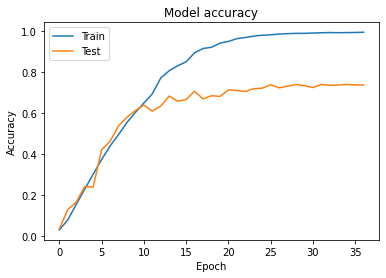

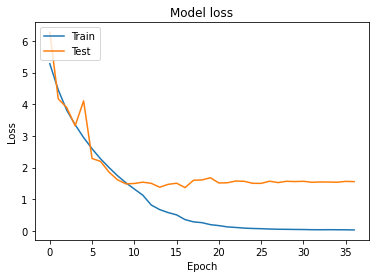

40/40 [==============================] - 2s 61ms/step - loss: 1.3090 - accuracy: 0.7704
Test loss: 1.3089781999588013
Test accuracy: 0.7703999876976013


In [ ]:
#plot accuracy vs epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot loss values vs epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Evaluate against test data.
scores = model.evaluate(test_data, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])


AlexNet model #2

In [14]:
#AlexNet model 2
backend.clear_session()
model = Sequential()
# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=SHAPE, kernel_size=(11,11), strides=(4,4), padding='same'))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())
model.add(Activation('relu'))
# Pooling 
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
# Batch Normalisation
model.add(BatchNormalization())
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
# Batch Normalisation
model.add(BatchNormalization())
model.add(Activation('relu'))
# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
# Batch Normalisation
model.add(BatchNormalization())
model.add(Activation('relu'))
# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
# Batch Normalisation
model.add(BatchNormalization())
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
# Fully Connected Layer
model.add(Flatten())
# 1st Dense Layer
model.add(Dense(4096, input_shape=(224*224*3,)))
# Batch Normalisation
model.add(BatchNormalization())
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# 2nd Dense Layer
model.add(Dense(4096))
# Batch Normalisation
model.add(BatchNormalization())
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# 3rd Dense Layer
model.add(Dense(1000))
# Batch Normalisation
model.add(BatchNormalization())
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Output Layer
model.add(Dense(Category_count))
# Batch Normalisation
model.add(BatchNormalization())
model.add(Activation('softmax'))
model.summary()

#Compile
optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=0.1, decay=0.0)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', 
              metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 54, 54, 96)        34944     
_________________________________________________________________
batch_normalization (BatchNo (None, 54, 54, 96)        384       
_________________________________________________________________
activation (Activation)      (None, 54, 54, 96)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 27, 27, 256)       1024      
_________________________________________________________________
activation_1 (Activation)    (None, 27, 27, 256)       0

In [15]:
#fit model
history = model.fit( 
    train_data, 
    steps_per_epoch = Train_groups, 
    epochs = 100,
    validation_data = validation_data,
    validation_steps = Valid_groups,
    verbose = 1,
    callbacks=[EarlyStopping(monitor='val_accuracy', patience = 5, restore_best_weights = True),
               ReduceLROnPlateau(monitor = 'val_loss', factor = 0.7, patience = 2, verbose = 1 )])

Epoch 1/100
1101/1101 [==============================] - 82s 73ms/step - loss: 5.8016 - accuracy: 0.0079 - val_loss: 4.7319 - val_accuracy: 0.1024
Epoch 2/100
1101/1101 [==============================] - 81s 73ms/step - loss: 4.9238 - accuracy: 0.0456 - val_loss: 4.3659 - val_accuracy: 0.1440
Epoch 3/100
1101/1101 [==============================] - 81s 74ms/step - loss: 4.4374 - accuracy: 0.1077 - val_loss: 4.0046 - val_accuracy: 0.1800
Epoch 4/100
1101/1101 [==============================] - 80s 73ms/step - loss: 4.0701 - accuracy: 0.1789 - val_loss: 3.2948 - val_accuracy: 0.3560
Epoch 5/100
1101/1101 [==============================] - 80s 73ms/step - loss: 3.7852 - accuracy: 0.2380 - val_loss: 3.0067 - val_accuracy: 0.4088
Epoch 6/100
1101/1101 [==============================] - 80s 73ms/step - loss: 3.5377 - accuracy: 0.2801 - val_loss: 2.6435 - val_accuracy: 0.4664
Epoch 7/100
1101/1101 [==============================] - 81s 73ms/step - loss: 3.2942 - accuracy: 0.3301 - val_loss: 2

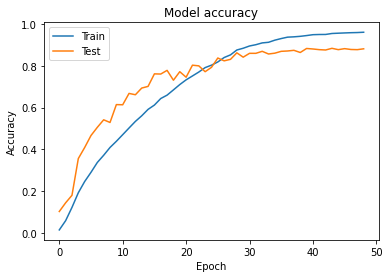

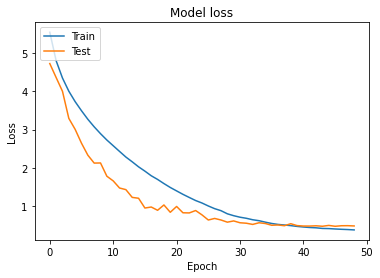

40/40 [==============================] - 2s 61ms/step - loss: 0.3927 - accuracy: 0.9008
Test loss: 0.39271795749664307
Test accuracy: 0.9007999897003174


In [16]:
#plot accuracy vs epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot loss values vs epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Evaluate against test data.
scores = model.evaluate(test_data, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])


DenseNet

In [17]:
#DenseNet
backend.clear_session()

#Bring in the imagenet dataset training weights for the VGG16 CNN model, remove the classification, the default shape is correct (3,224,224) for my purposes.
base_Dens121 = DenseNet121(weights = 'imagenet', include_top = False, input_shape = SHAPE)
base_Dens121.trainable = False # Freeze the VGG16 weights.

model = Sequential()
model.add(base_Dens121)

model.add(Flatten()) #1024#model.add(Dense(256)) 
model.add(Activation('relu'))
model.add(Dense(Category_count)) 
model.add(Activation('softmax'))

model.summary()
#Compile
model.compile(optimizer = tf.keras.optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True),
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

29089792/29084464 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Functional)     (None, 7, 7, 1024)        7037504   
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0         
_________________________________________________________________
activation (Activation)      (None, 50176)             0         
_________________________________________________________________
dense (Dense)                (None, 250)               12544250  
_________________________________________________________________
activation_1 (Activation)    (None, 250)               0         
Total params: 19,581,754
Trainable params: 12,544,250
Non-trainable params: 7,037,504
_________________________________________________________________


In [18]:
#fit model
history = model.fit_generator( 
    train_data, 
    steps_per_epoch = Train_groups, 
    epochs = 50,
    validation_data = validation_data,
    validation_steps = Valid_groups,
    verbose = 1,
    callbacks=[EarlyStopping(monitor='val_accuracy', patience = 5, restore_best_weights = True),ReduceLROnPlateau(monitor = 'val_loss', factor = 0.7, #0.2 to 0.5 dropped to fast 0.7
                                 patience = 2, verbose = 1)])  

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


1101/1101 [==============================] - 119s 102ms/step - loss: 2.9841 - accuracy: 0.5567 - val_loss: 1.0149 - val_accuracy: 0.8544
Epoch 2/50
1101/1101 [==============================] - 109s 99ms/step - loss: 0.3655 - accuracy: 0.9313 - val_loss: 0.3949 - val_accuracy: 0.9216
Epoch 3/50
1101/1101 [==============================] - 110s 100ms/step - loss: 0.1407 - accuracy: 0.9696 - val_loss: 0.3604 - val_accuracy: 0.9392
Epoch 4/50
1101/1101 [==============================] - 109s 99ms/step - loss: 0.0437 - accuracy: 0.9893 - val_loss: 0.2928 - val_accuracy: 0.9472
Epoch 5/50
1101/1101 [==============================] - 110s 100ms/step - loss: 0.0229 - accuracy: 0.9936 - val_loss: 0.3272 - val_accuracy: 0.9512
Epoch 6/50
1101/1101 [==============================] - 110s 100ms/step - loss: 0.0057 - accuracy: 0.9987 - val_loss: 0.2509 - val_accuracy: 0.9600
Epoch 7/50
1101/1101 [==============================] - 110s 100ms/step - loss: 0.0095 - accuracy: 0.9987 - val_loss: 0.2402 

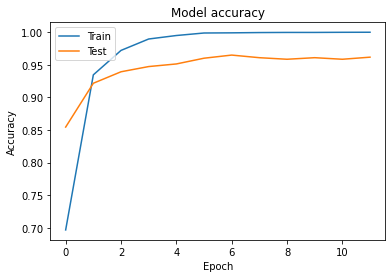

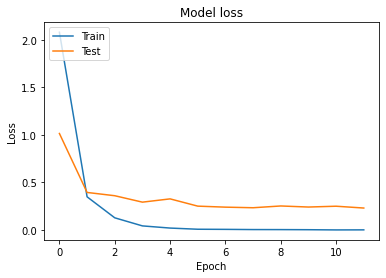

40/40 [==============================] - 4s 92ms/step - loss: 0.1947 - accuracy: 0.9672
Test loss: 0.1947181224822998
Test accuracy: 0.967199981212616


In [19]:
#plot accuracy vs epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot loss values vs epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Evaluate against test data.
scores = model.evaluate(test_data, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])